In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle

from plotter import *

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

import warnings
warnings.filterwarnings('ignore')

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.2

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

systematics = [
    'PS_weightUp','PS_weightDown',
    'PDF_weightUp','PDF_weightDown',
    'scalevar_7ptUp','scalevar_7ptDown','scalevar_3ptUp','scalevar_3ptDown'
    ]

systematics_Wjets = [
    'W_d2kappa_EWDown','W_d2kappa_EWUp','W_d3kappa_EWDown','W_d3kappa_EWUp',
    'd1K_NLODown','d1K_NLOUp','d1kappa_EWDown','d1kappa_EWUp',
    'd2K_NLODown','d2K_NLOUp','d3K_NLODown','d3K_NLOUp',
    ]

systematics_Zjets = [
    'Z_d2kappa_EWDown','Z_d2kappa_EWUp','Z_d3kappa_EWDown','Z_d3kappa_EWUp',
    'd1K_NLODown','d1K_NLOUp','d1kappa_EWDown','d1kappa_EWUp',
    'd2K_NLODown','d2K_NLOUp','d3K_NLODown','d3K_NLOUp',
    ]

In [3]:
year = '2016'
ddbthr = 0.64

In [4]:
ggf = pickle.load(open('pickles/'+str(year)+'_templates-th.pkl','rb')).integrate('region','signal-ggf')
vbf = pickle.load(open('pickles/'+str(year)+'_templates-th.pkl','rb')).integrate('region','signal-vbf')
mucr = pickle.load(open('pickles/'+str(year)+'_templates-th.pkl','rb')).integrate('region','muoncontrol')

In [5]:
# MSD PLOTS
ggf_pass = ggf.integrate('ddb1',int_range=slice(ddbthr,1)).sum('pt1').integrate('mjj',overflow='allnan')
vbf_pass = vbf.integrate('ddb1',int_range=slice(ddbthr,1)).sum('pt1').integrate('mjj',overflow='allnan')

ggf_all = ggf.sum('ddb1','pt1').integrate('mjj',overflow='allnan')
vbf_all = vbf.sum('ddb1','pt1').integrate('mjj',overflow='allnan')

mucr_pass = mucr.integrate('ddb1',int_range=slice(ddbthr,1)).sum('pt1').integrate('mjj',overflow='allnan')
mucr_all = mucr.sum('ddb1','pt1').integrate('mjj',overflow='allnan')

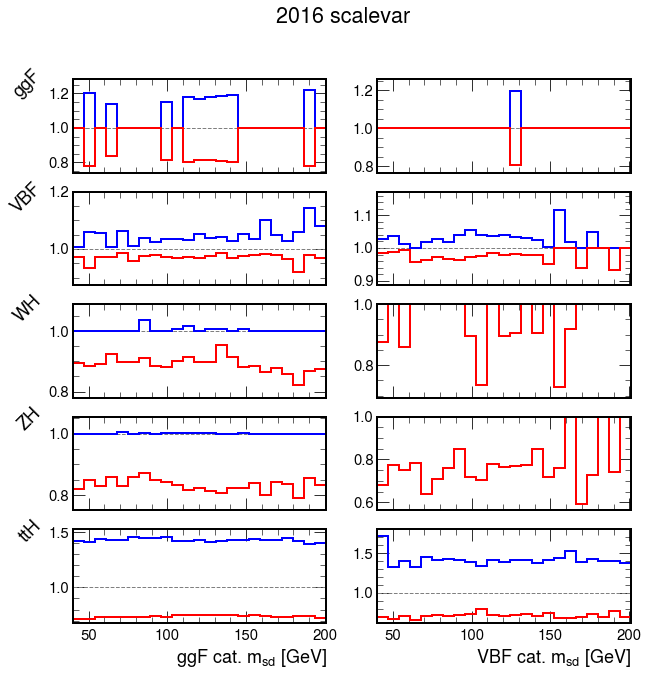

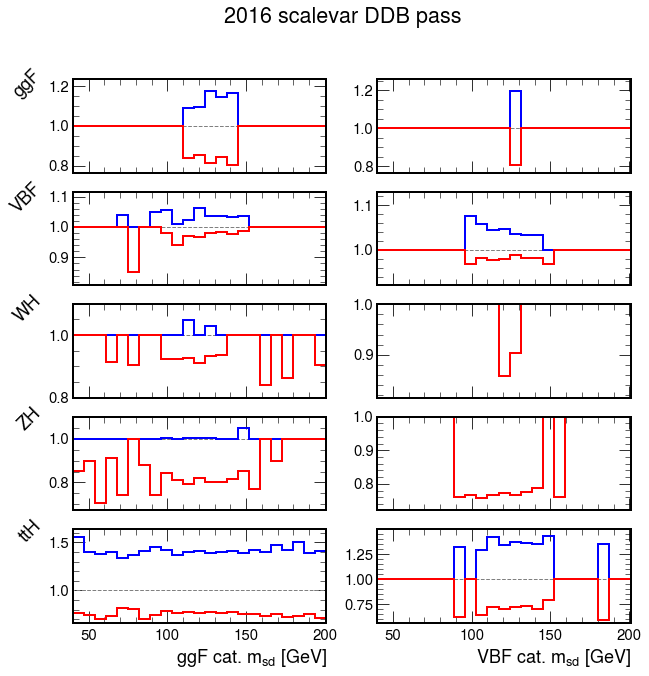

In [6]:
s = 'scalevar'
plot_syst_scalevar(ggf_all, vbf_all, year+' '+s, year+'/sig_'+s+'_msd1')
plot_syst_scalevar(ggf_pass, vbf_pass, year+' '+s+' DDB pass', year+'/sig_'+s+'_msd1_pass')

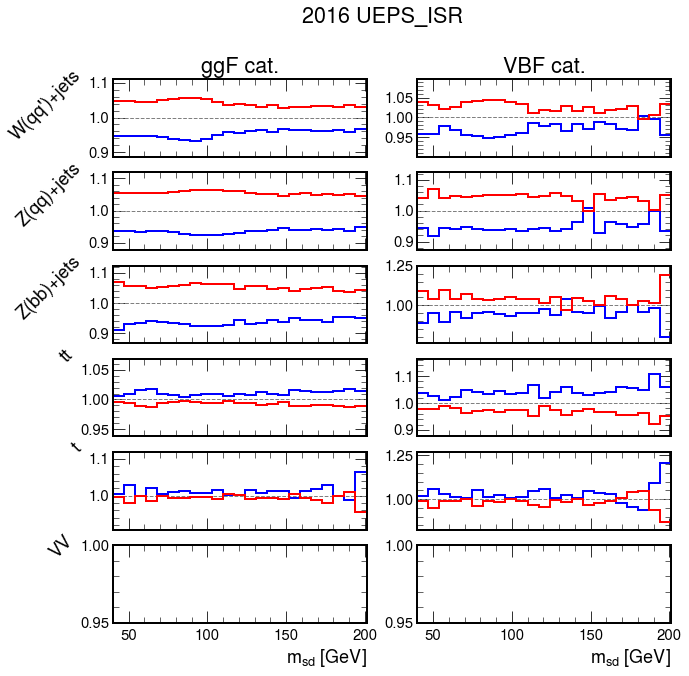

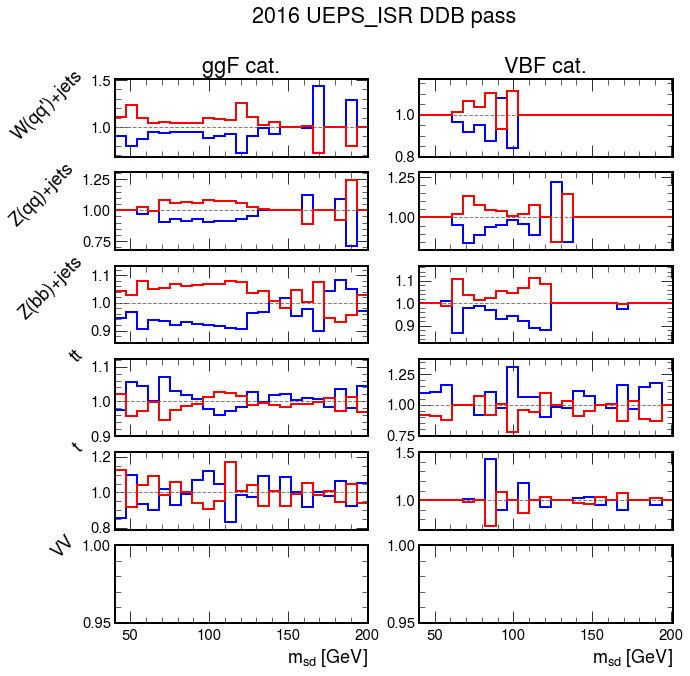

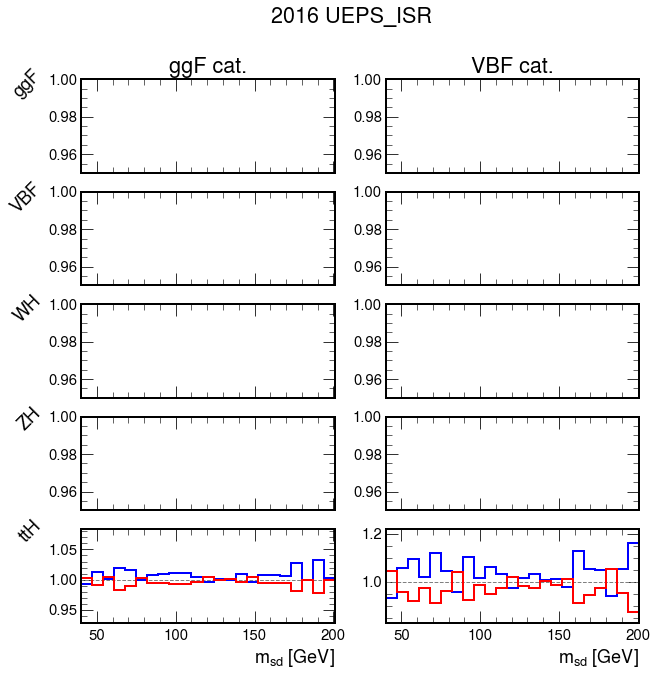

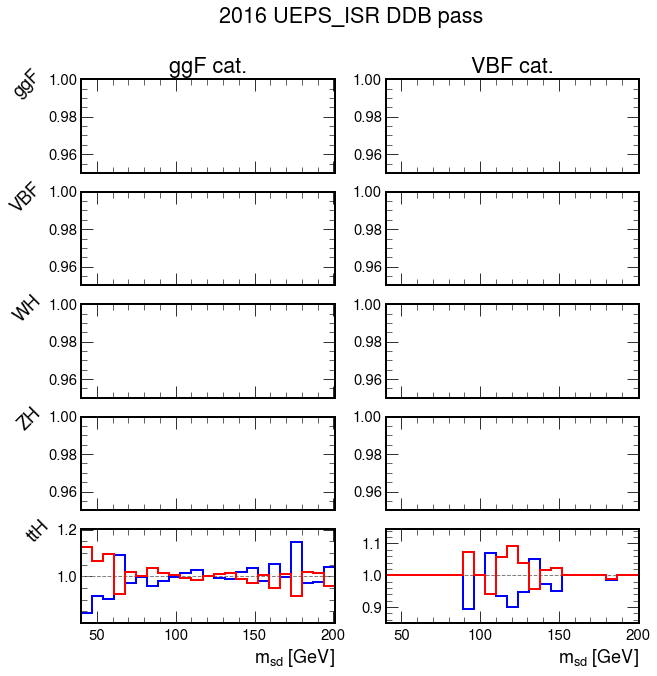

In [7]:
s = 'UEPS_ISR'
plot_syst_allbkg(ggf_all, vbf_all, s, "$m_{sd}$ [GeV]", year+' '+s, year+'/bkg_'+s+'_msd1')
plot_syst_allbkg(ggf_pass, vbf_pass, s, "$m_{sd}$ [GeV]", year+' '+s+' DDB pass', year+'/bkg_'+s+'_msd1_pass')

plot_syst_allsig(ggf_all, vbf_all, s, "$m_{sd}$ [GeV]", year+' '+s, year+'/sig_'+s+'_msd1')
plot_syst_allsig(ggf_pass, vbf_pass, s, "$m_{sd}$ [GeV]", year+' '+s+' DDB pass', year+'/sig_'+s+'_msd1_pass')

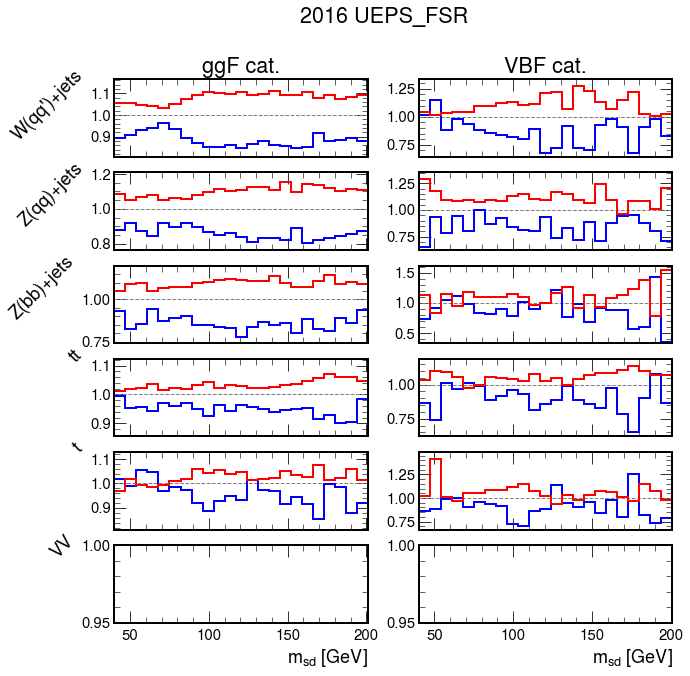

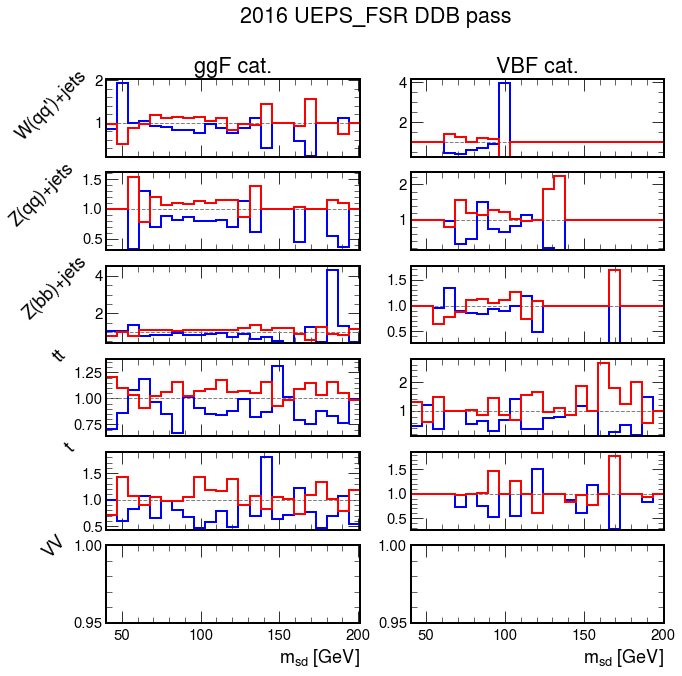

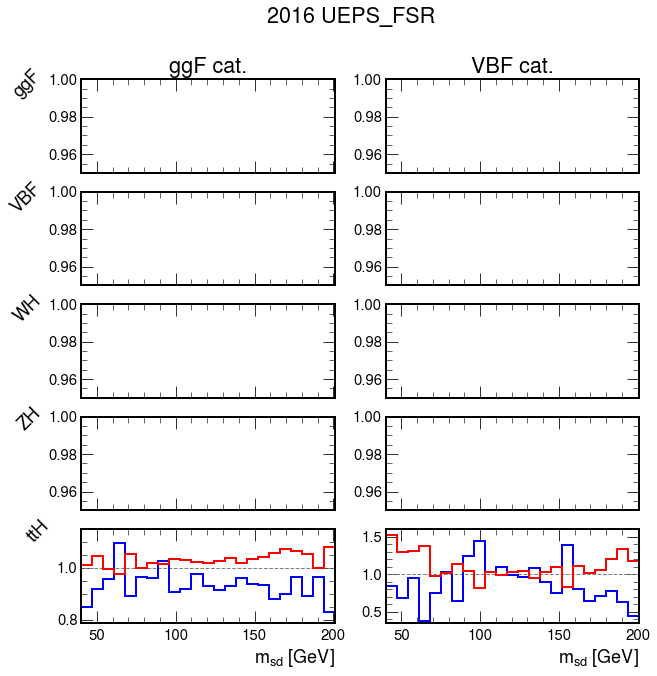

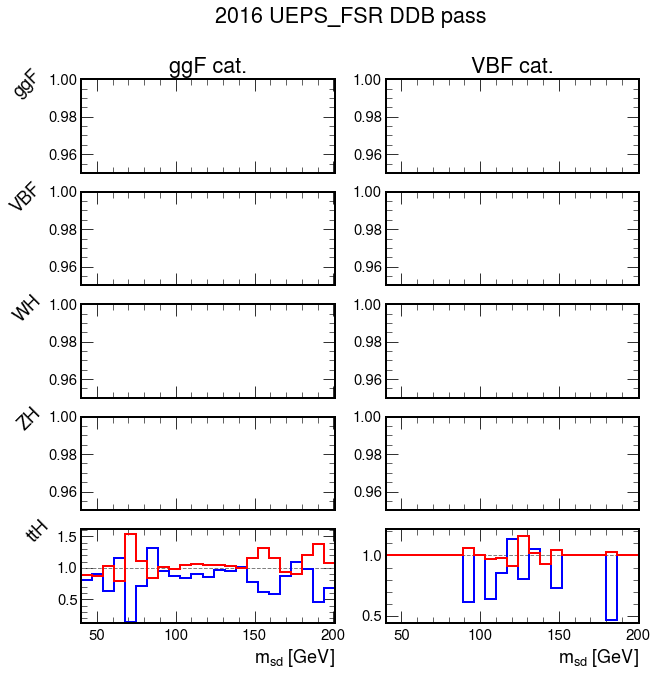

In [8]:
s = 'UEPS_FSR'
plot_syst_allbkg(ggf_all, vbf_all, s, "$m_{sd}$ [GeV]", year+' '+s, year+'/bkg_'+s+'_msd1')
plot_syst_allbkg(ggf_pass, vbf_pass, s, "$m_{sd}$ [GeV]", year+' '+s+' DDB pass', year+'/bkg_'+s+'_msd1_pass')

plot_syst_allsig(ggf_all, vbf_all, s, "$m_{sd}$ [GeV]", year+' '+s, year+'/sig_'+s+'_msd1')
plot_syst_allsig(ggf_pass, vbf_pass, s, "$m_{sd}$ [GeV]", year+' '+s+' DDB pass', year+'/sig_'+s+'_msd1_pass')

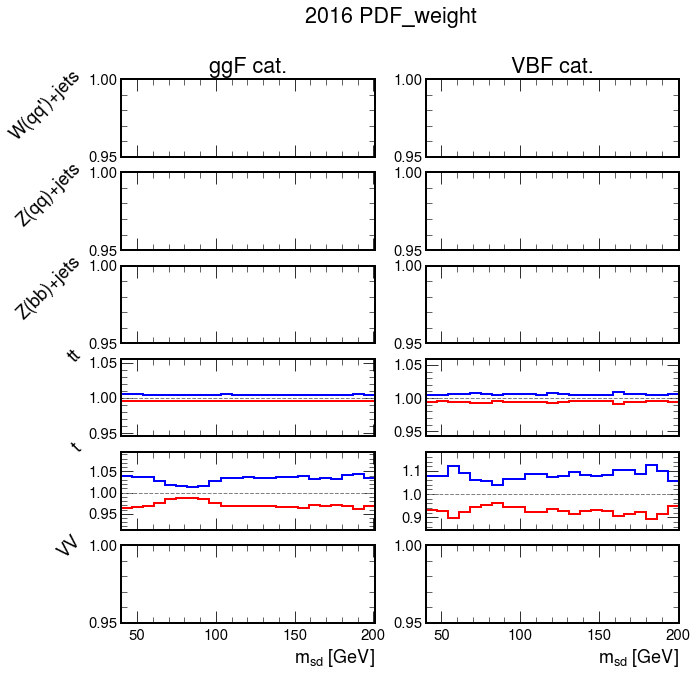

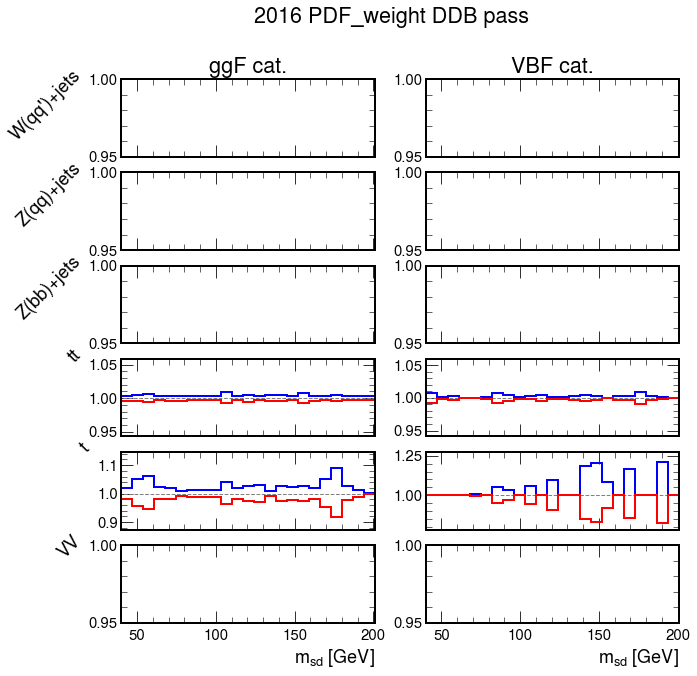

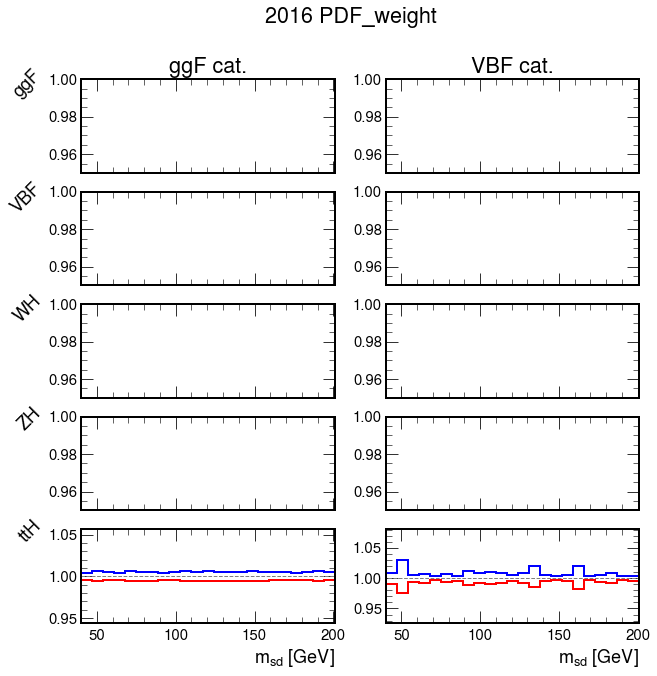

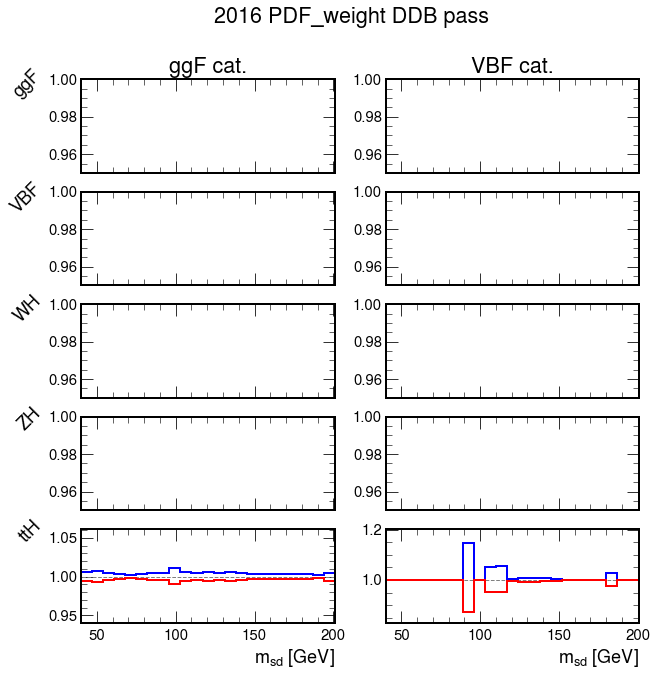

In [9]:
s = 'PDF_weight'
plot_syst_allbkg(ggf_all, vbf_all, s, "$m_{sd}$ [GeV]", year+' '+s, year+'/bkg_'+s+'_msd1')
plot_syst_allbkg(ggf_pass, vbf_pass, s, "$m_{sd}$ [GeV]", year+' '+s+' DDB pass', year+'/bkg_'+s+'_msd1_pass')

plot_syst_allsig(ggf_all, vbf_all, s, "$m_{sd}$ [GeV]", year+' '+s, year+'/sig_'+s+'_msd1')
plot_syst_allsig(ggf_pass, vbf_pass, s, "$m_{sd}$ [GeV]", year+' '+s+' DDB pass', year+'/sig_'+s+'_msd1_pass')

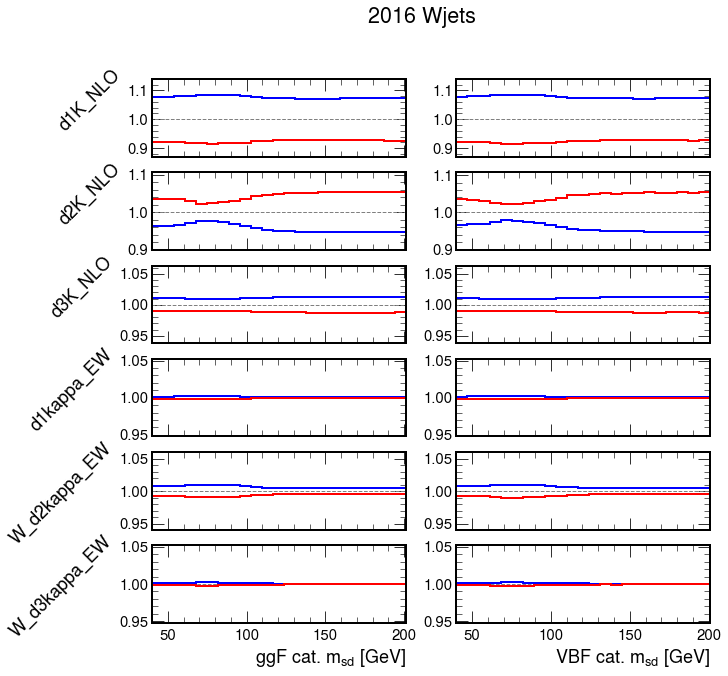

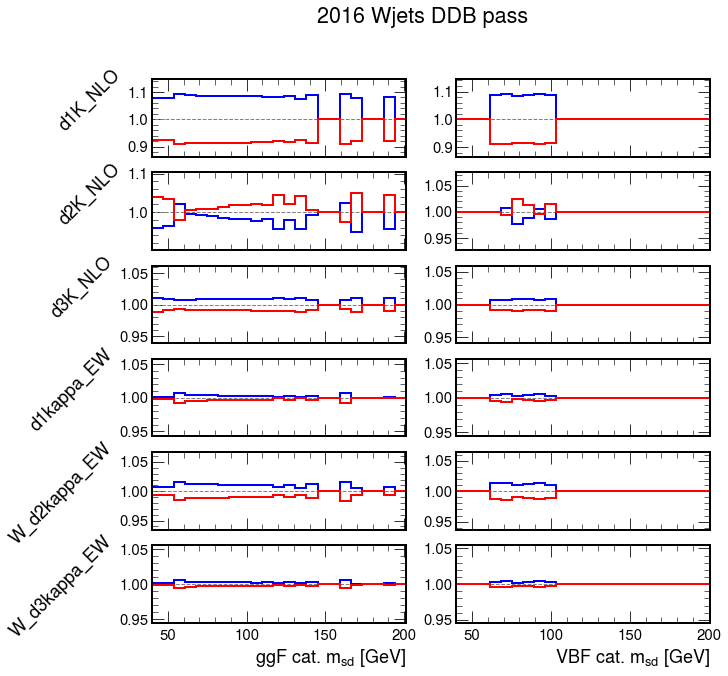

In [10]:
s = 'Wjets'
plot_syst_Vjets(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+s+'_msd1')
plot_syst_Vjets(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/'+s+'_msd1_pass')

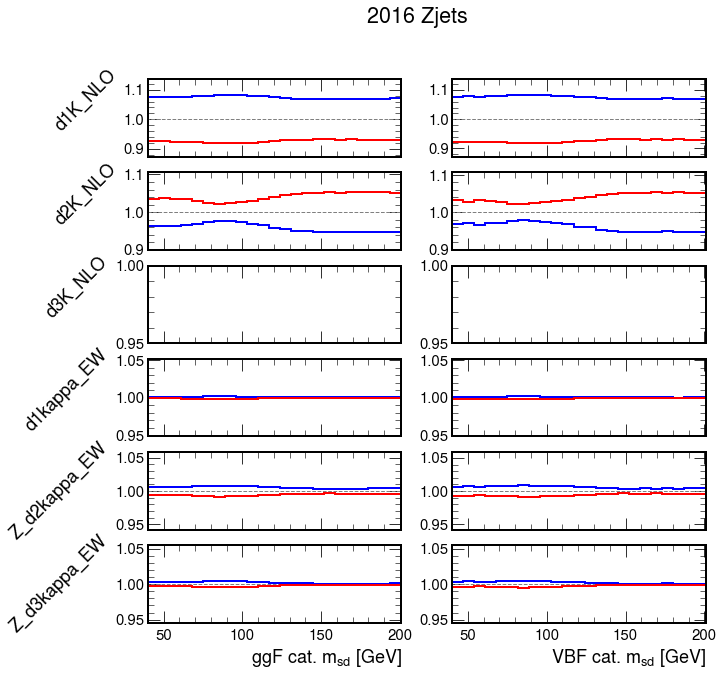

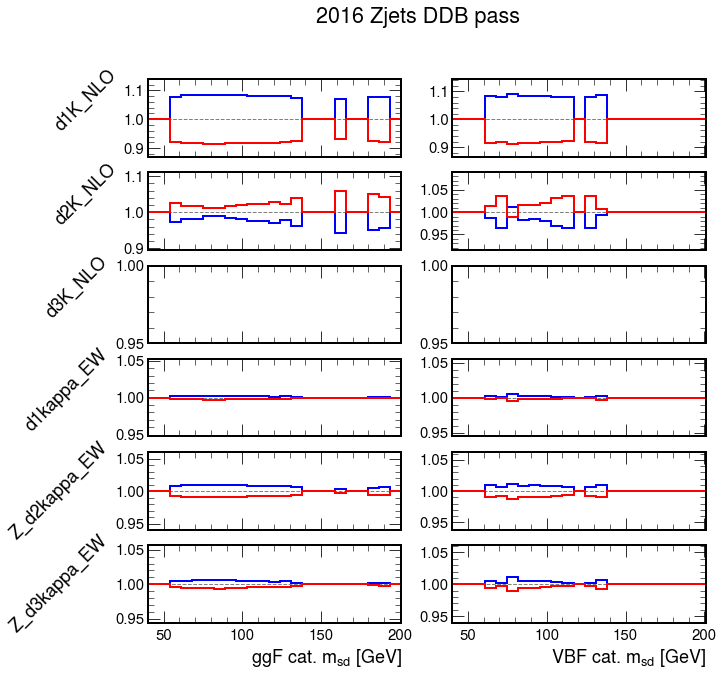

In [11]:
s = 'Zjets'
plot_syst_Vjets(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+s+'_msd1')
plot_syst_Vjets(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/'+s+'_msd1_pass')

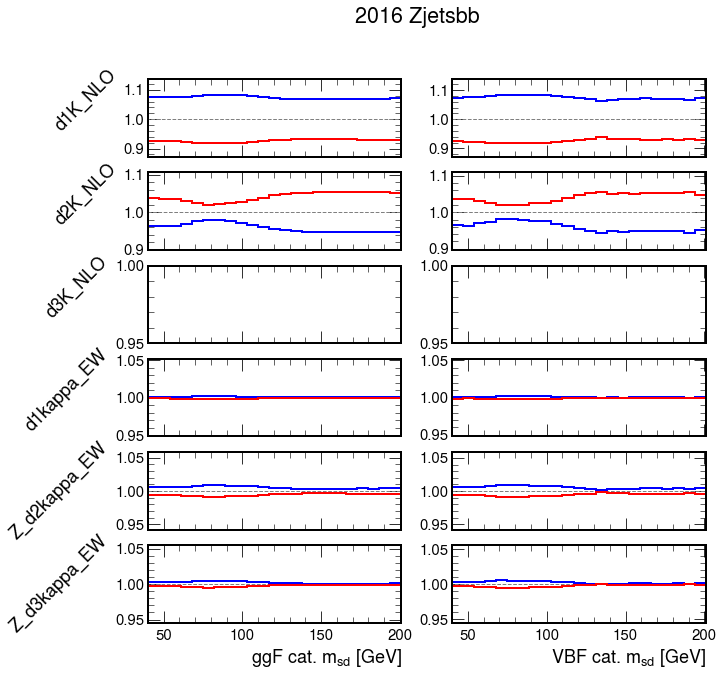

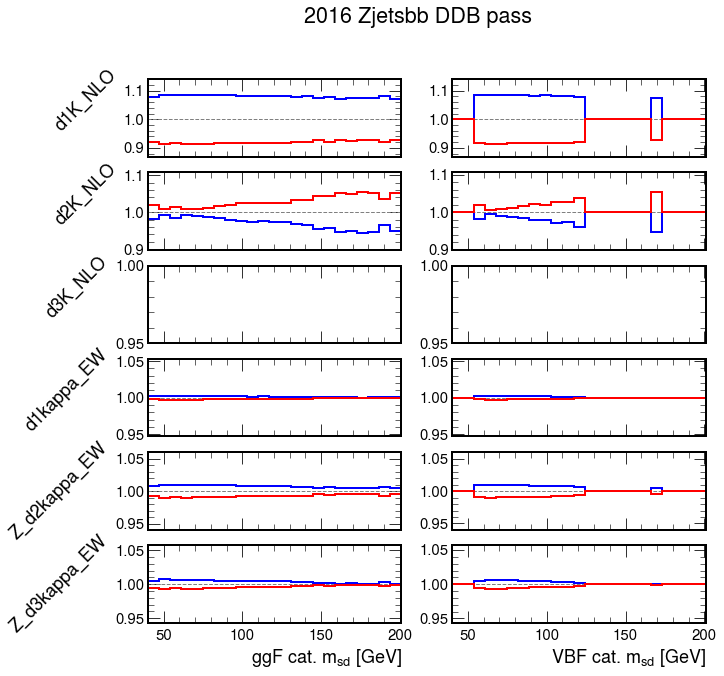

In [12]:
s = 'Zjetsbb'
plot_syst_Vjets(ggf_all, vbf_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+s+'_msd1')
plot_syst_Vjets(ggf_pass, vbf_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/'+s+'_msd1_pass')

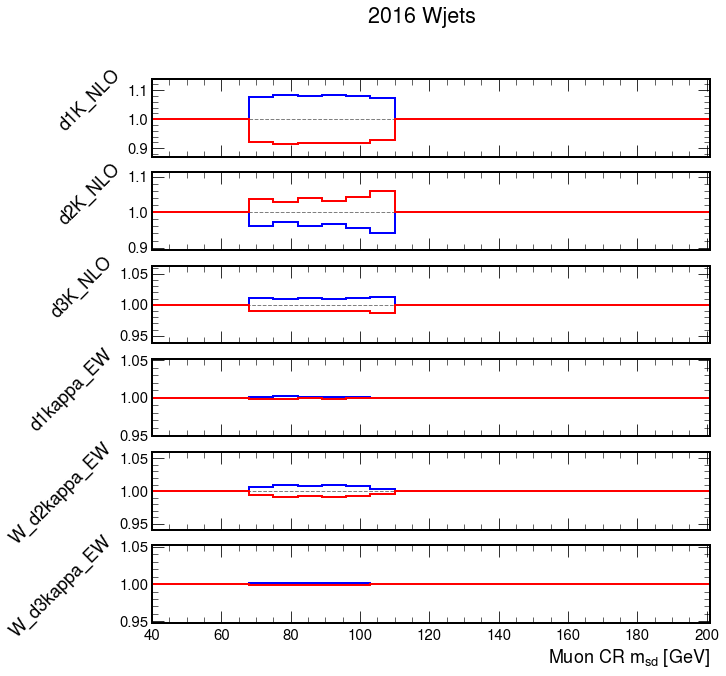

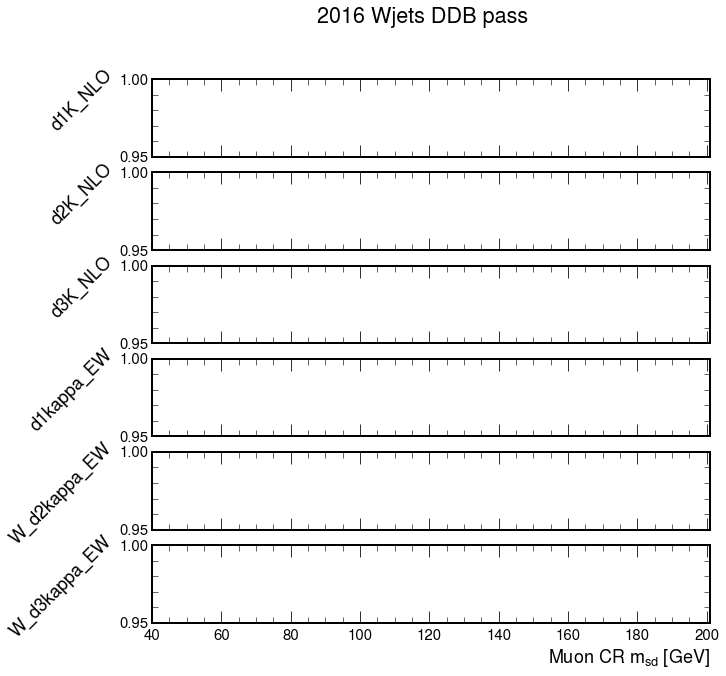

In [13]:
s = 'Wjets'
plot_syst_Vjets_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/mucr_'+s+'_msd1')
plot_syst_Vjets_mucr(mucr_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/mucr_'+s+'_msd1_pass')

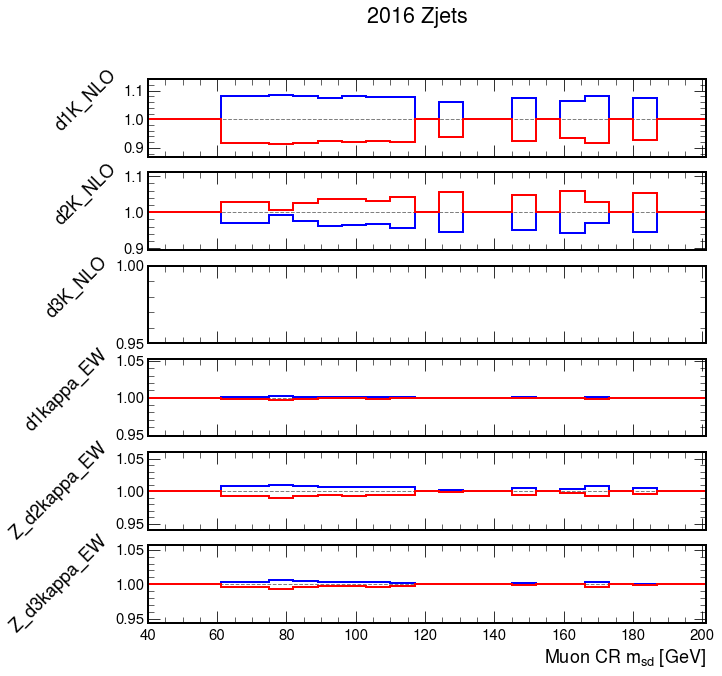

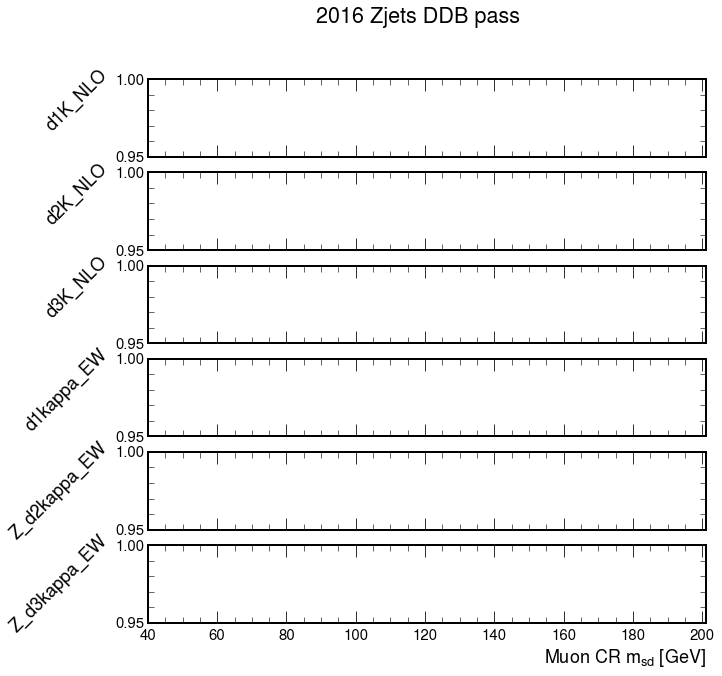

In [14]:
s = 'Zjets'
plot_syst_Vjets_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/mucr_'+s+'_msd1')
plot_syst_Vjets_mucr(mucr_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/mucr_'+s+'_msd1_pass')

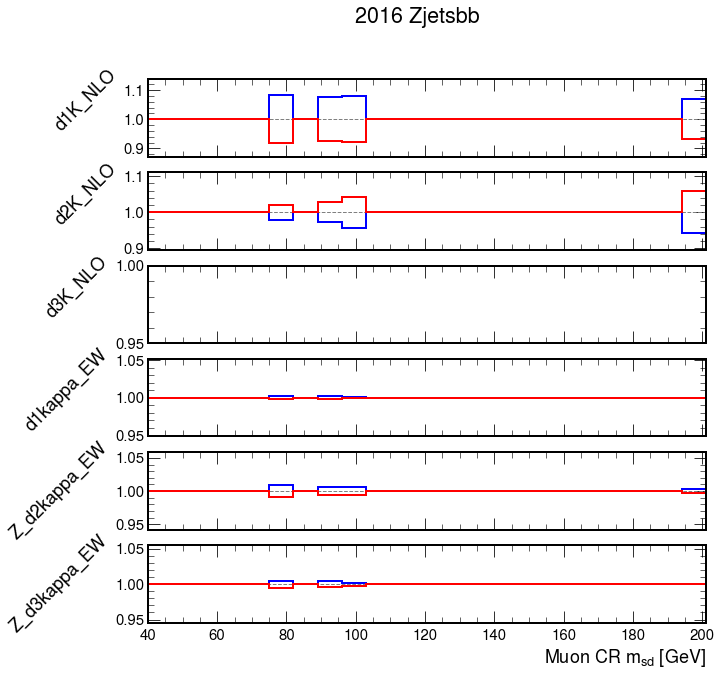

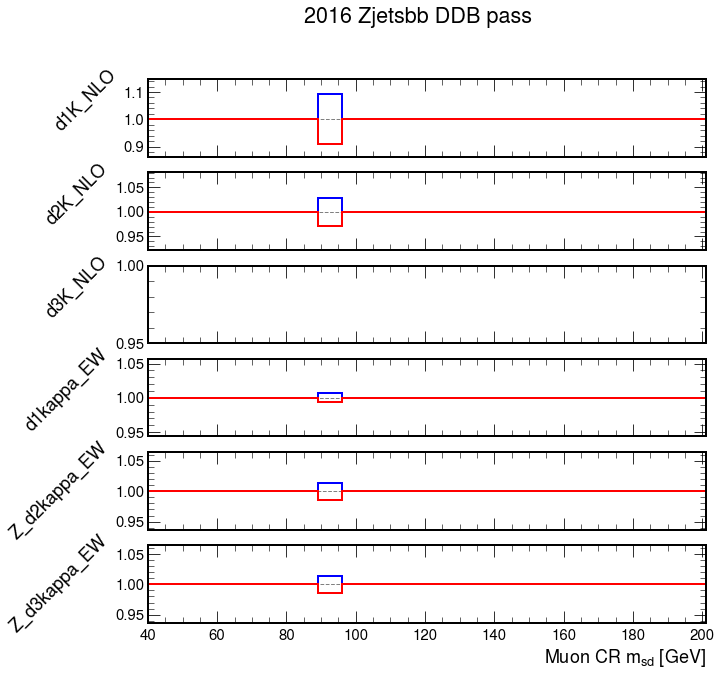

In [15]:
s = 'Zjetsbb'
plot_syst_Vjets_mucr(mucr_all, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/mucr_'+s+'_msd1')
plot_syst_Vjets_mucr(mucr_pass, s, '$m_{sd}$ [GeV]', year+' '+s+' DDB pass', year+'/mucr_'+s+'_msd1_pass')

In [16]:
ggf_pass = ggf.integrate('ddb1',int_range=slice(ddbthr,1)).sum('mjj',overflow='allnan')
vbf_pass = vbf.integrate('ddb1',int_range=slice(ddbthr,1)).sum('pt1')

ggf_all = ggf.sum('ddb1').sum('mjj',overflow='allnan')
vbf_all = vbf.sum('ddb1').sum('pt1')

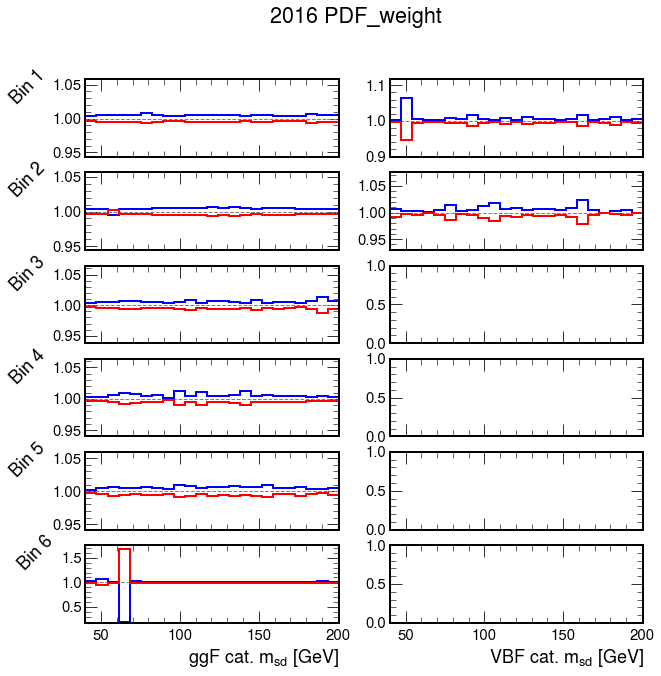

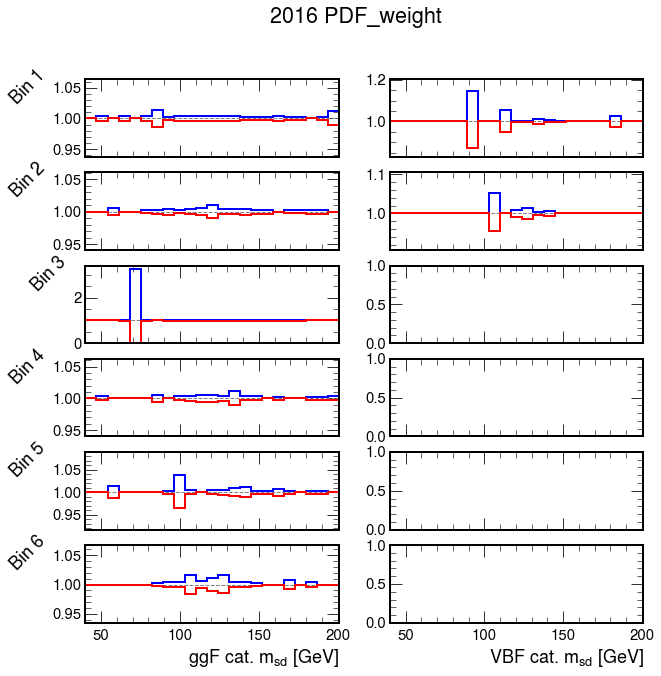

In [17]:
p = 'ttH'
s = 'PDF_weight'
plot_syst_bins(ggf_all, vbf_all, p, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+p+'_'+s+'_msd1')
plot_syst_bins(ggf_pass, vbf_pass, p, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+p+'_'+s+'_msd1')

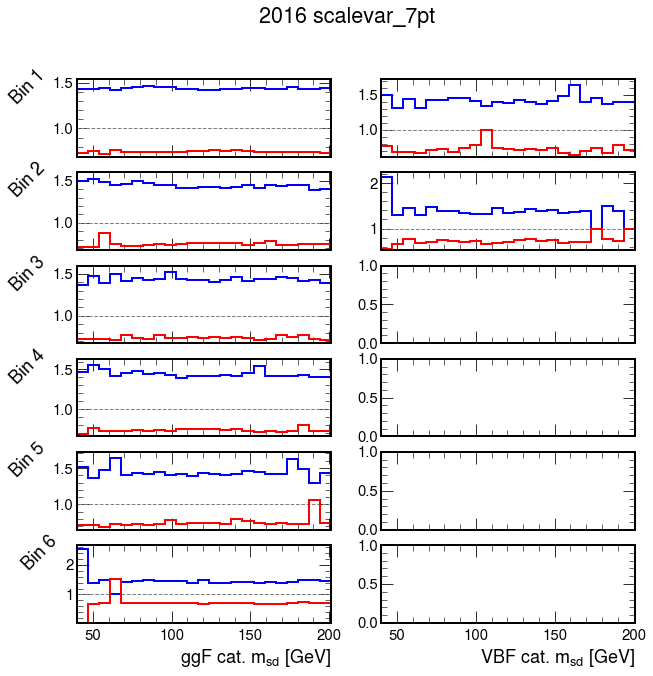

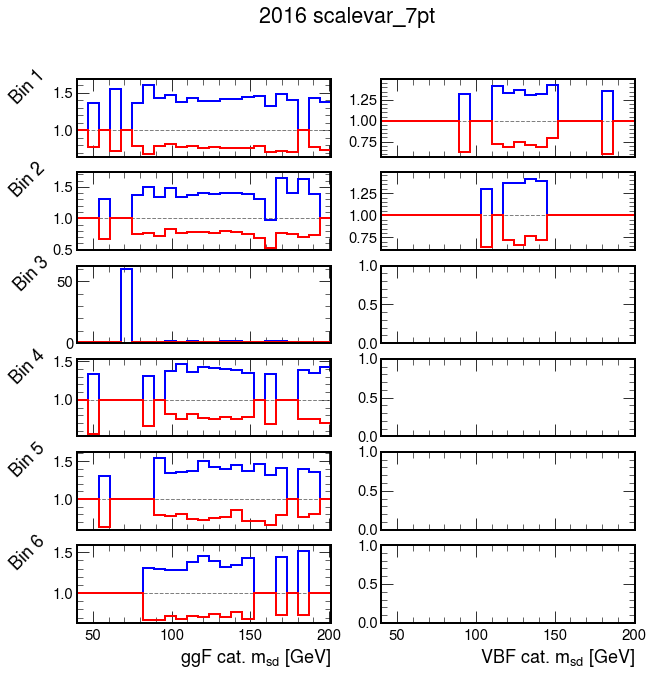

In [18]:
p = 'ttH'
s = 'scalevar_7pt'
plot_syst_bins(ggf_all, vbf_all, p, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+p+'_'+s+'_msd1')
plot_syst_bins(ggf_pass, vbf_pass, p, s, '$m_{sd}$ [GeV]', year+' '+s, year+'/'+p+'_'+s+'_msd1')

In [19]:
# PT PLOTS
#ggf_pass = ggf.integrate('ddb1',int_range=slice(ddbthr,1)).sum('msd1')
#vbf_pass = vbf.integrate('ddb1',int_range=slice(ddbthr,1)).sum('msd1')

#ggf_all = ggf.sum('ddb1','msd1')
#vbf_all = vbf.sum('ddb1','msd1')

In [20]:
#s = 'PDF_weight'

#plot_syst_allbkg(ggf_all, vbf_all, s, "$p_T$ [GeV]", year+' '+s, year+'/bkg_'+s+'_pt1')
#plot_syst_allbkg(ggf_pass, vbf_pass, s, "$p_T$ [GeV]", year+' '+s+' DDB pass', year+'/bkg_'+s+'_pt1_pass')

#plot_syst_allsig(ggf_all, vbf_all, s, "$p_T$ [GeV]", year+' '+s, year+'/sig_'+s+'_pt1')
#plot_syst_allsig(ggf_pass, vbf_pass, s, "$p_T$ [GeV]", year+' '+s+' DDB pass', year+'/sig_'+s+'_pt1_pass')

In [21]:
#s = 'Wjets'
#plot_syst_Vjets(ggf_all, vbf_all, s, '$p_T$ [GeV]', year+' '+s, year+'/'+s+'_pt1')
#plot_syst_Vjets(ggf_pass, vbf_pass, s, '$p_T$ [GeV]', year+' '+s+' DDB pass', year+'/'+s+'_pt1_pass')

In [22]:
#s = 'Zjets'
#plot_syst_Vjets(ggf_all, vbf_all, s, '$p_T$ [GeV]', year+' '+s, year+'/'+s+'_pt1')
#plot_syst_Vjets(ggf_pass, vbf_pass, s, '$p_T$ [GeV]', year+' '+s+' DDB pass', year+'/'+s+'_pt1_pass')

In [23]:
#s = 'Zjetsbb'
#plot_syst_Vjets(ggf_all, vbf_all, s, '$p_T$ [GeV]', year+' '+s, year+'/'+s+'_pt1')
#plot_syst_Vjets(ggf_pass, vbf_pass, s, '$p_T$ [GeV]', year+' '+s+' DDB pass', year+'/'+s+'_pt1_pass')